In [56]:
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt 

In [13]:
model = keras.models.load_model('./models/sonnenschein')
test = pd.read_csv("./test_data.csv")[["age", "sex", "payment_type", "was_canceled"]]

In [14]:
test

,age,sex,payment_type,was_canceled
0,17,1,0,1
1,26,0,0,0
2,81,1,0,1
3,44,1,0,1
4,19,0,1,0
...,...,...,...,...
193,25,0,1,0
194,41,0,1,1
195,56,0,0,0
196,84,1,0,1


In [27]:
age_test = np.asarray(test["age"])
sex_test = np.asarray(test["sex"].astype("int32"))
payment_type_test = np.asarray(test["payment_type"].astype("int32"))
X_Test = np.stack((age_test, sex_test, payment_type_test), axis=-1)
y_test = (test['was_canceled']>0.1)

In [26]:
X_Test[0]

array([17,  1,  0], dtype=int64)

In [51]:
threshold_range = np.arange(0.1, 1, 0.001)
precision_list = []
predicition = model.predict(X_Test)

for threshold in threshold_range:
    y_predict = (predicition>threshold)
    precision = precision_score(y_test, y_predict)
    precision_list.append(precision)


7/7 [==============================] - 0s 1ms/step


C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Local

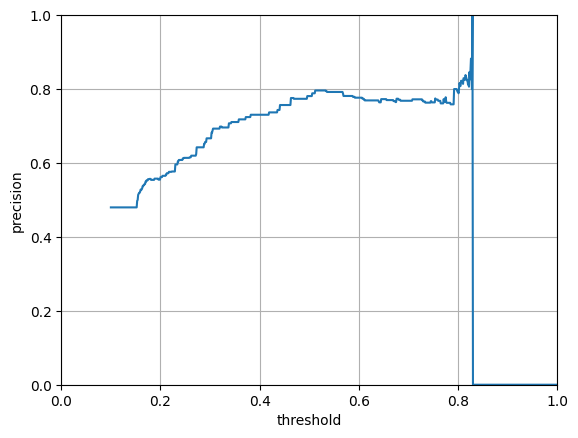

In [61]:
plt.plot(threshold_range, precision_list)
plt.ylabel('precision')
plt.xlabel('threshold')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid()